<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Multiple Subplots](04.08-Multiple-Subplots.ipynb) | [Contents](Index.ipynb) | [Customizing Ticks](04.10-Customizing-Ticks.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.09-Text-and-Annotation.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# 文字和註解

除了xy軸以外，也可以在圖表中加入一些文字幫助理解

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

## 範例: 假日對於美國出生人數之影響

In [3]:
births = pd.read_csv('/content/births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from ipykernel import kernelapp as app


In [5]:
births_by_date

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625
...,...
2012-12-27,4850.150
2012-12-28,5044.200
2012-12-29,5120.150
2012-12-30,5172.350


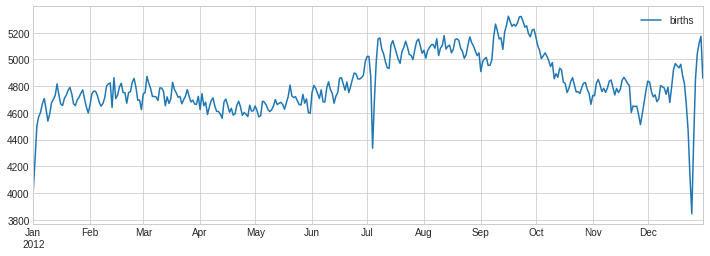

In [4]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

``plt.text``/``ax.text``:在特徵處加上註解，幫助閱讀者理解內容

[Text(0, 0.5, 'average daily births'),
 Text(0.5, 1.0, 'USA births by day of year (1969-1988)')]

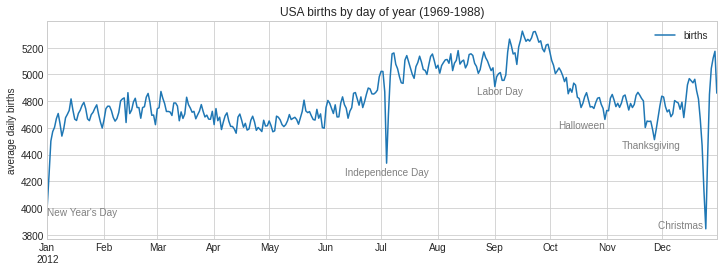

In [9]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# 在圖表中加上標籤
style = dict(size=10, color='gray')

# 設定字體要放在哪一個位置
ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# 在axes加上標籤
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

``ax.text``方法接受x位置、y位置、以及一個字串，還有額外的關鍵字可以指定顏色、大小、樣式、對齊以及其他的文字屬性。

在此使用``ha='right'``以及``ha='center'``, 其中``ha``是*水平對齊*的簡寫。


## 轉換以及文字位置

在Matplotlib, 可透過*轉換*來把文字固定在axes或圖表上的某一個位置。
- ``ax.transData``: 和資料座標相關的轉換
- ``ax.transAxes``: 和axes(使用axes尺寸的單位)相關的轉換
- ``fig.transFigure``: 和figure(使用figure尺寸的單位)相關的轉換

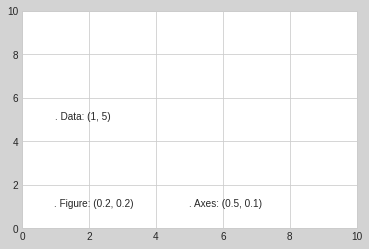

In [12]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# 預設的轉換是ax.transData，但是我們還是直接設定上去
# https://blog.csdn.net/qq_31347869/article/details/104794515
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes) # The coordinate system of the Axes; (0, 0) is bottom left of the axes, and (1, 1) is top right of the axes.
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure); # The coordinate system of the Figure; (0, 0) is bottom left of the figure, and (1, 1) is top right of the figure.

``transData``給一個x和y軸的位置標籤。
``transAxes``給的位置從axes的左下角(白色的盒子)當做是axes尺寸的部分。 
``transFigure``座標也是類似的方式，但指定的位置是從figure左下角(灰色的盒子)當做是figure尺寸的部分。

若改變了axes的限制，則只有``transData``的座標會被影響，而其他2個則保持不變: 

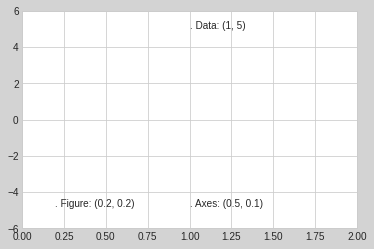

In [13]:
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

## 箭頭和註解

``plt.annotate()``可以彈性的建立箭頭和文字。
``plt.arrow()``建立的箭頭會形成svg物件，該物件的比例會根據圖表而改變。

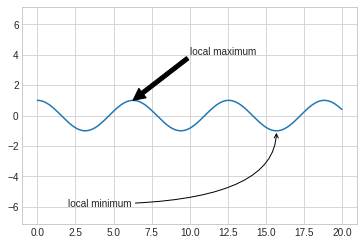

In [21]:
%matplotlib inline

fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black'))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

箭頭的樣是透過``arrowprops``字典控制，有許多選項可以使用。

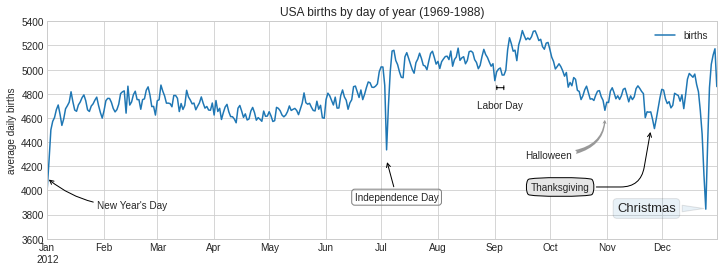

In [11]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# 在plot上加上標籤
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# 在axes加上標籤
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

ax.set_ylim(3600, 5400);

<!--NAVIGATION-->
< [Multiple Subplots](04.08-Multiple-Subplots.ipynb) | [Contents](Index.ipynb) | [Customizing Ticks](04.10-Customizing-Ticks.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.09-Text-and-Annotation.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
